In [1]:

import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.read_csv("spaceship-titanic/train.csv")
df_test = pd.read_csv("spaceship-titanic/test.csv")

y_train = df_train['Transported']




In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df_train.shape

(8693, 14)

In [4]:
df_train.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
df_train.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5641,5998_01,Earth,False,G/977/S,TRAPPIST-1e,30.0,False,477.0,0.0,8.0,0.0,323.0,Mara Haydenzier,True
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
2273,2442_01,Mars,True,F/505/P,TRAPPIST-1e,34.0,NaN,0.0,0.0,0.0,0.0,0.0,Beals Perie,True
6598,6967_01,Europa,False,C/256/S,55 Cancri e,37.0,False,0.0,9965.0,0.0,5697.0,676.0,Winon Oilpfulle,False
3050,3294_02,Earth,True,G/537/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Elinda Georgasey,False
5467,5828_01,Earth,False,G/941/P,TRAPPIST-1e,21.0,False,621.0,0.0,0.0,0.0,0.0,Bethy Goldendrice,False
1101,1165_04,Europa,True,B/44/P,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Okulas Waring,True
4232,4505_01,Europa,False,C/165/S,55 Cancri e,53.0,False,0.0,864.0,49.0,39.0,2376.0,Erraid Wirdley,True
1172,1238_02,Europa,True,B/53/S,TRAPPIST-1e,61.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
562,0588_01,Earth,True,G/89/P,PSO J318.5-22,20.0,False,0.0,0.0,0.0,0.0,0.0,Camiet Delazarson,False


In [6]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
from prettytable import PrettyTable

# Calculate NaN counts
train_nan = df_train.isnull().sum()
test_nan = df_test.isnull().sum()

# Create PrettyTable
nan_table = PrettyTable()
nan_table.field_names = ["Column", "Train NaN Count", "Test NaN Count"]

for col in set(train_nan.index).union(test_nan.index):
    nan_table.add_row([col, train_nan.get(col, 0), test_nan.get(col, 0)])

print(nan_table)

+--------------+-----------------+----------------+
|    Column    | Train NaN Count | Test NaN Count |
+--------------+-----------------+----------------+
|  FoodCourt   |       183       |      106       |
| ShoppingMall |       208       |       98       |
|  HomePlanet  |       201       |       87       |
| RoomService  |       181       |       82       |
|  CryoSleep   |       217       |       93       |
| Destination  |       182       |       92       |
|     Name     |       200       |       94       |
|    VRDeck    |       188       |       80       |
|     Spa      |       183       |      101       |
|    Cabin     |       199       |      100       |
|     VIP      |       203       |       93       |
| PassengerId  |        0        |       0        |
| Transported  |        0        |       0        |
|     Age      |       179       |       91       |
+--------------+-----------------+----------------+


In [8]:


from prettytable import PrettyTable

# Calculate missing value percentages
train_missing = (df_train.isnull().sum() / len(df_train) * 100)
test_missing = (df_test.isnull().sum() / len(df_test) * 100)

# Create PrettyTable
table = PrettyTable()
table.field_names = ["Column", "Train Missing (%)", "Test Missing (%)"]

for col in set(train_missing.index).union(test_missing.index):
    train_pct = train_missing.get(col, 0)
    test_pct = test_missing.get(col, 0)
    table.add_row([col, f"{train_pct:.2f}", f"{test_pct:.2f}"])

print(table)

+--------------+-------------------+------------------+
|    Column    | Train Missing (%) | Test Missing (%) |
+--------------+-------------------+------------------+
|  FoodCourt   |        2.11       |       2.48       |
| ShoppingMall |        2.39       |       2.29       |
|  HomePlanet  |        2.31       |       2.03       |
| RoomService  |        2.08       |       1.92       |
|  CryoSleep   |        2.50       |       2.17       |
| Destination  |        2.09       |       2.15       |
|     Name     |        2.30       |       2.20       |
|    VRDeck    |        2.16       |       1.87       |
|     Spa      |        2.11       |       2.36       |
|    Cabin     |        2.29       |       2.34       |
|     VIP      |        2.34       |       2.17       |
| PassengerId  |        0.00       |       0.00       |
| Transported  |        0.00       |       0.00       |
|     Age      |        2.06       |       2.13       |
+--------------+-------------------+------------

#### Checking missing values in the dataset

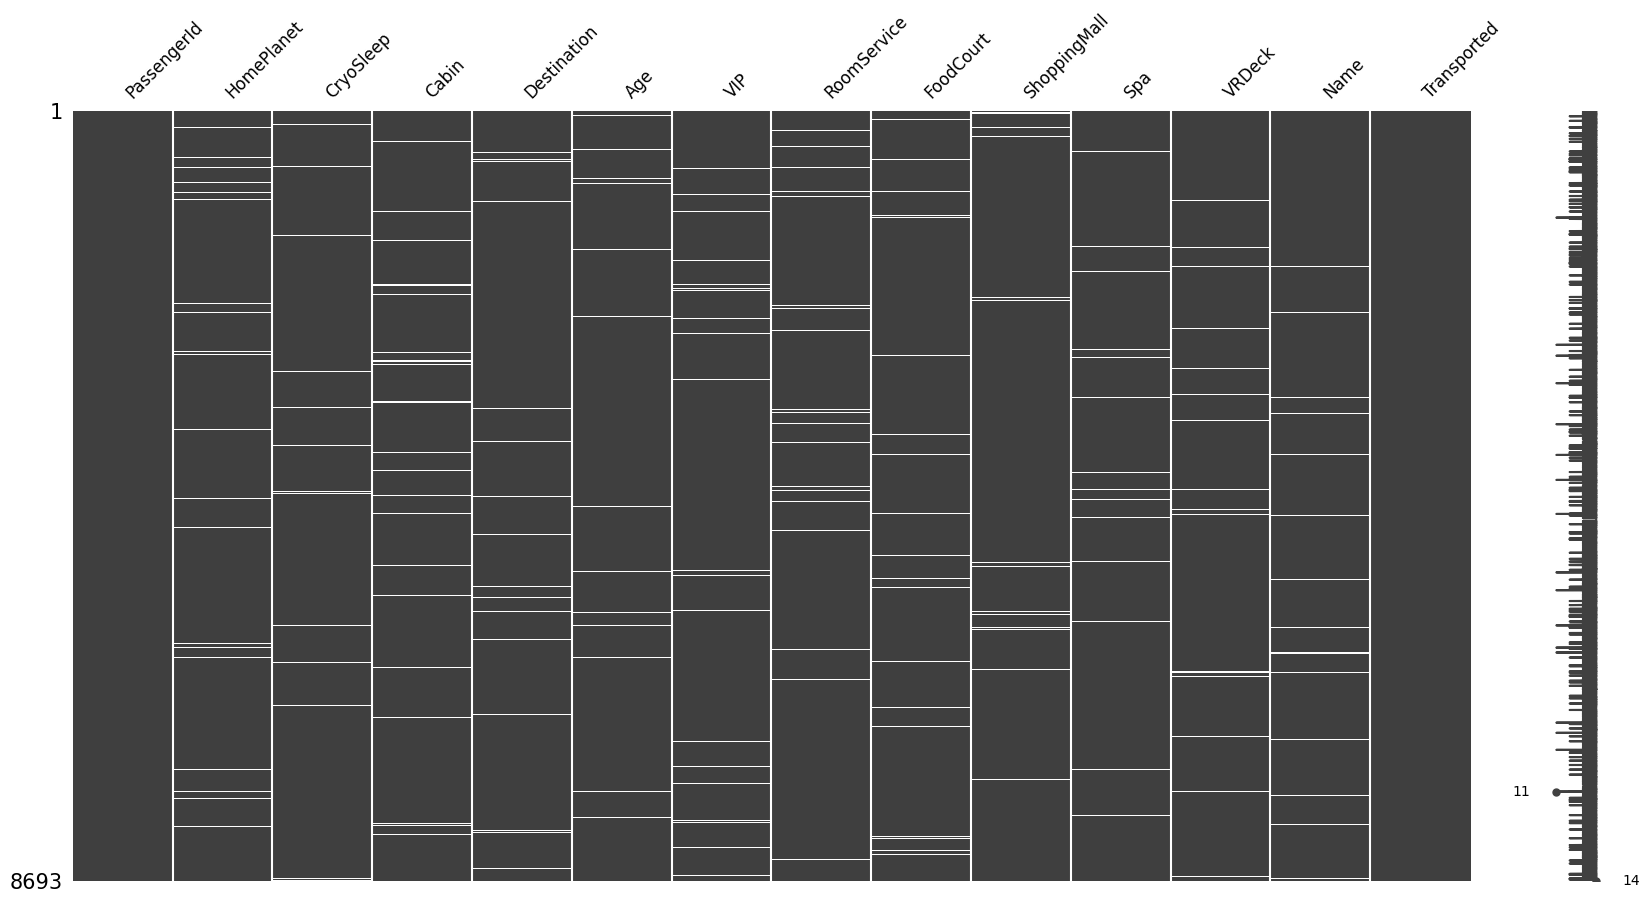

In [9]:

import missingno as mn
mn.matrix(df_train, figsize=(20, 10), fontsize=12)
plt.show()


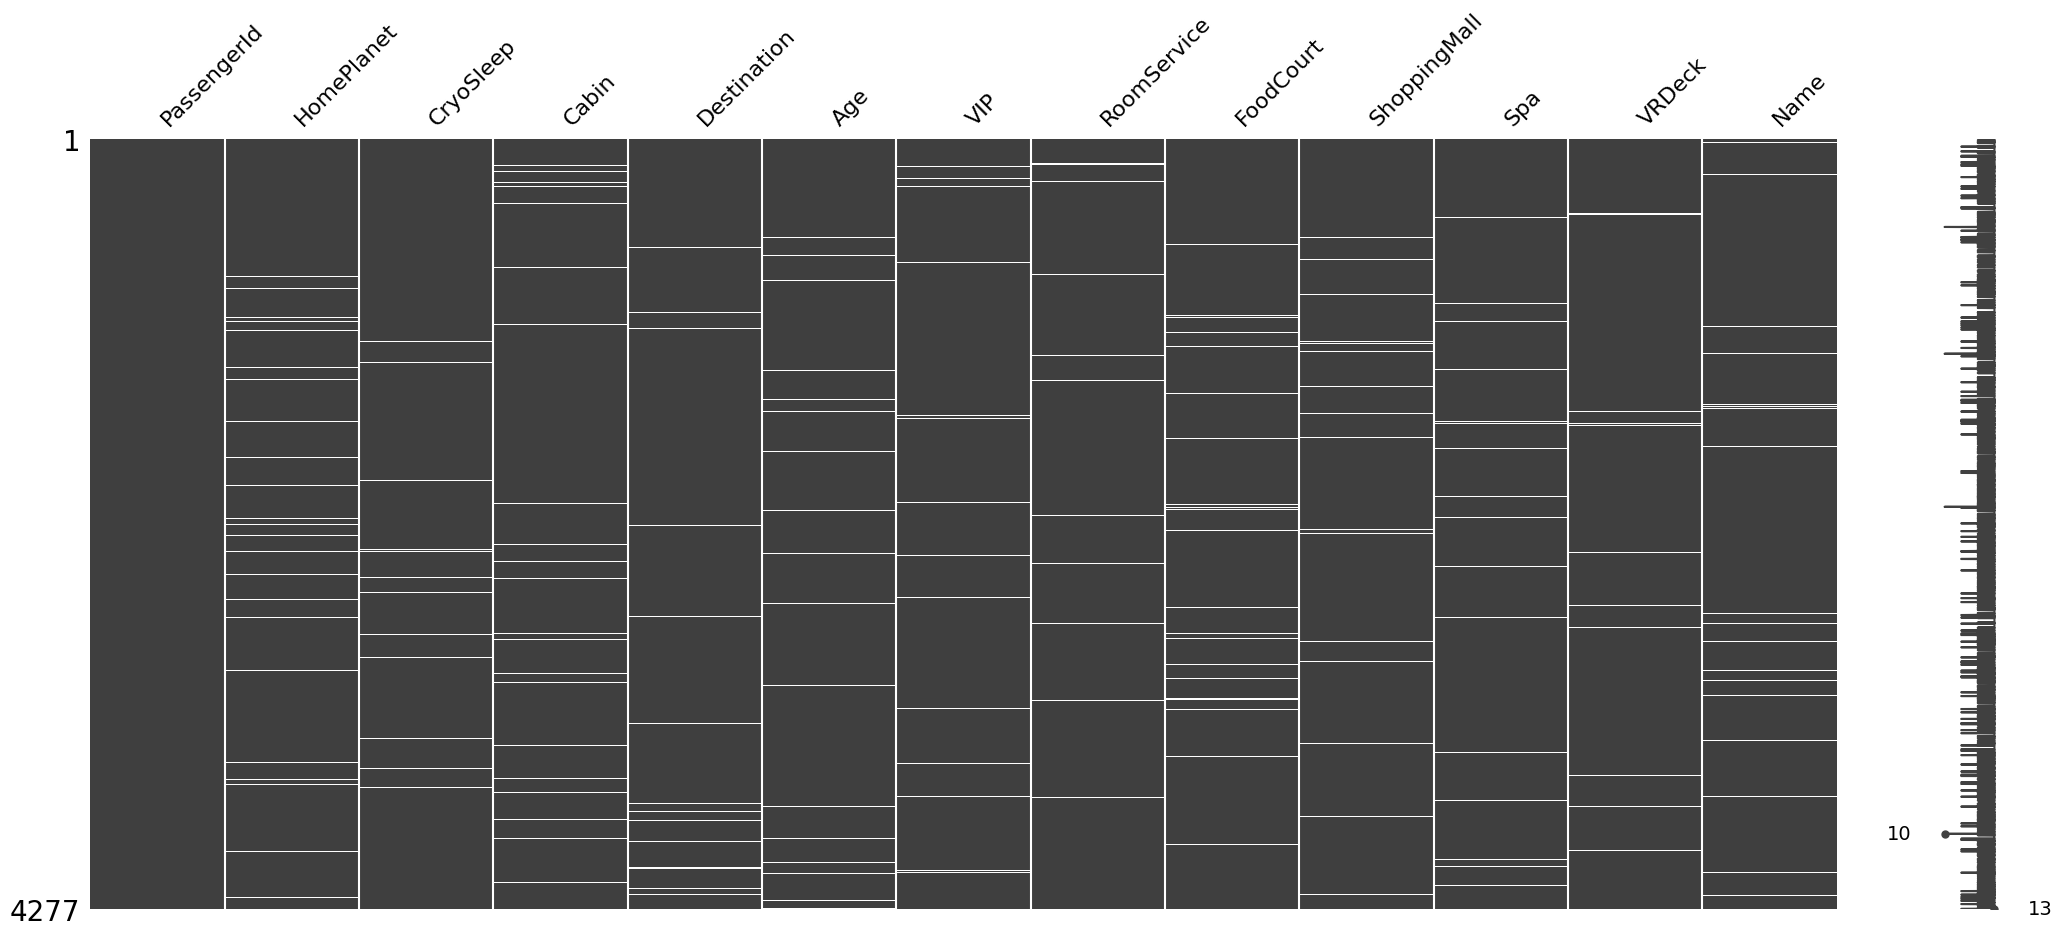

In [10]:
mn.matrix(df_test)
plt.show()


We observe a significant number of null values in the training dataset.
These missing values will need to be handled appropriately after the Exploratory Data Analysis (EDA) phase

#### Target Analysis

In [11]:
import plotly.express as px

transported_counts = df_train['Transported'].value_counts()
fig_transported_pie = px.pie(
    names=transported_counts.index.astype(str),
    values=transported_counts.values,
    title='Distribution of Transported'
)
fig_transported_pie.show()

The distribution of the target variable (Transported) is fairly balanced, indicating that the dataset does not suffer from major class imbalance.
This is ideal for training classification models, as they are less likely to be biased toward one class.

#### Numerical analysis

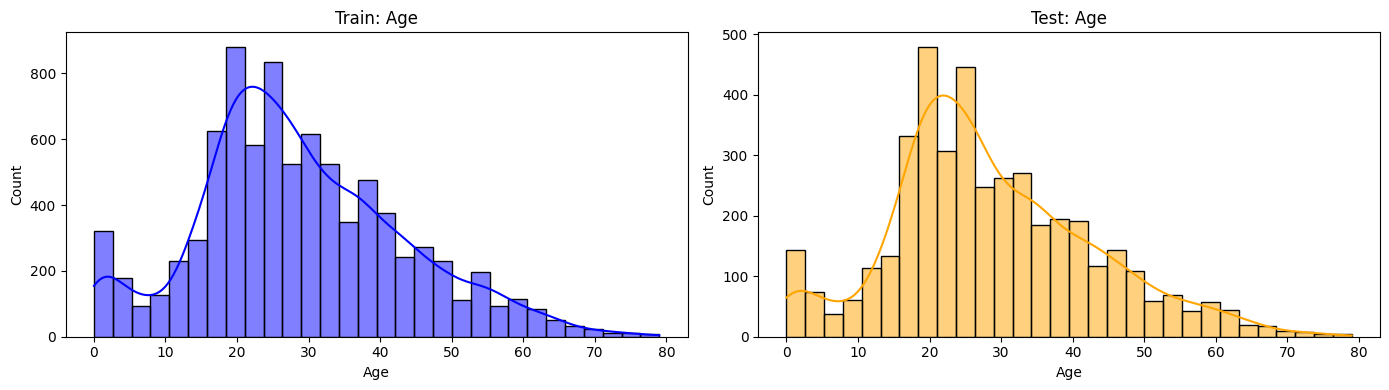

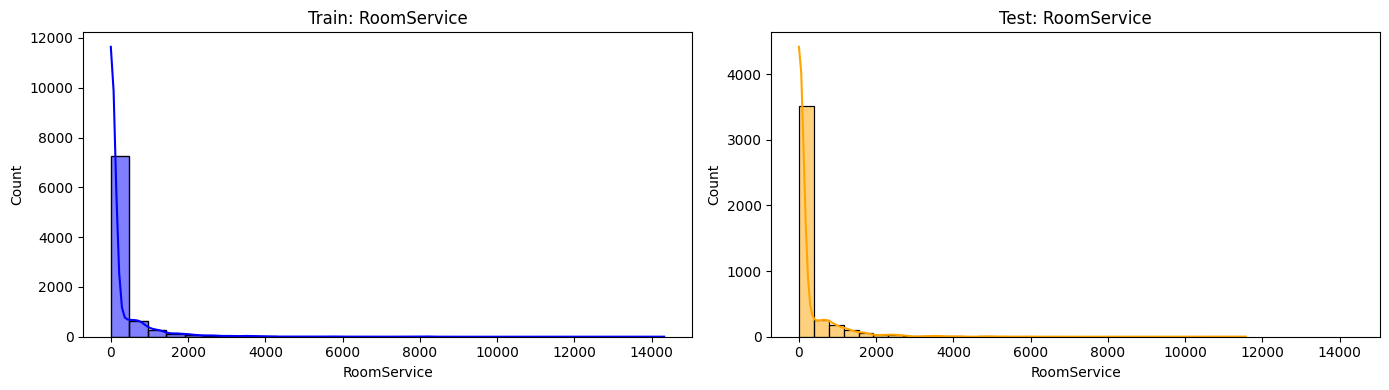

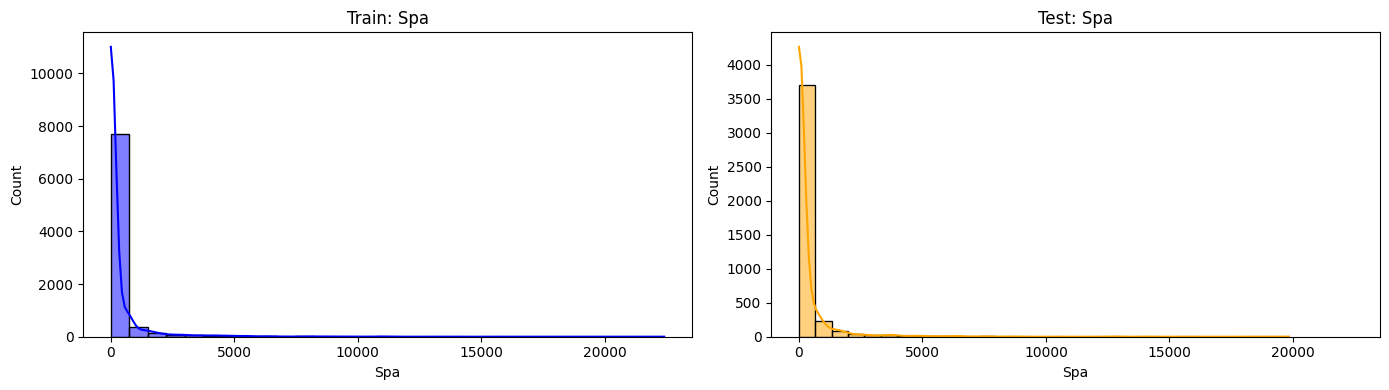

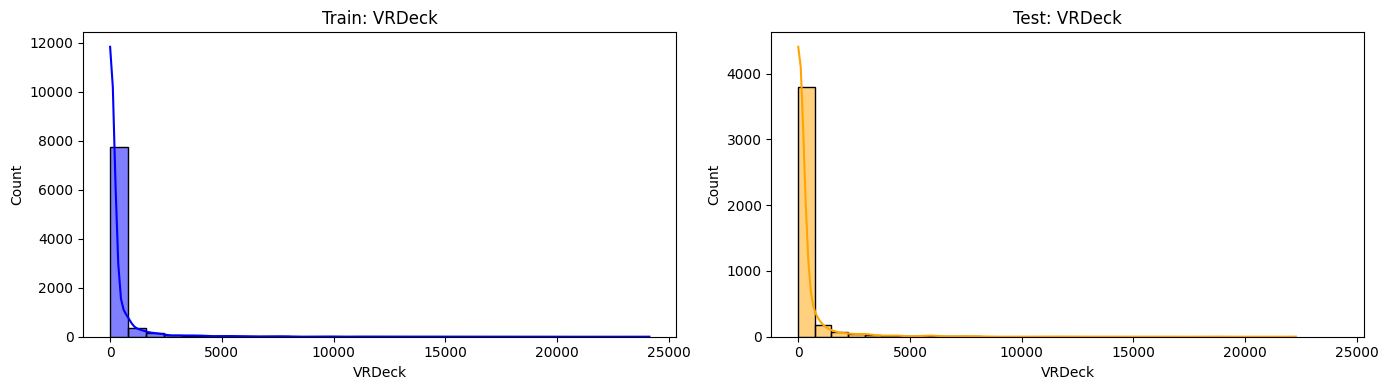

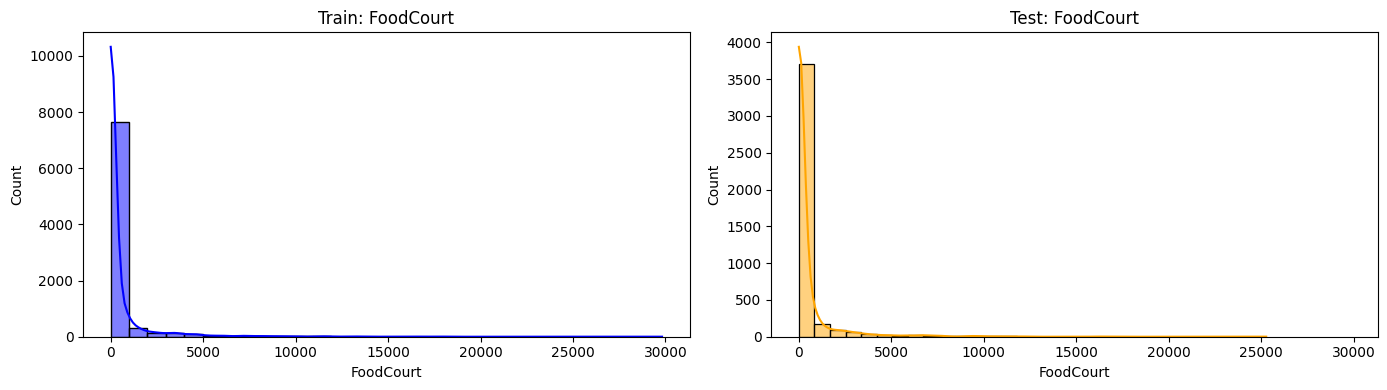

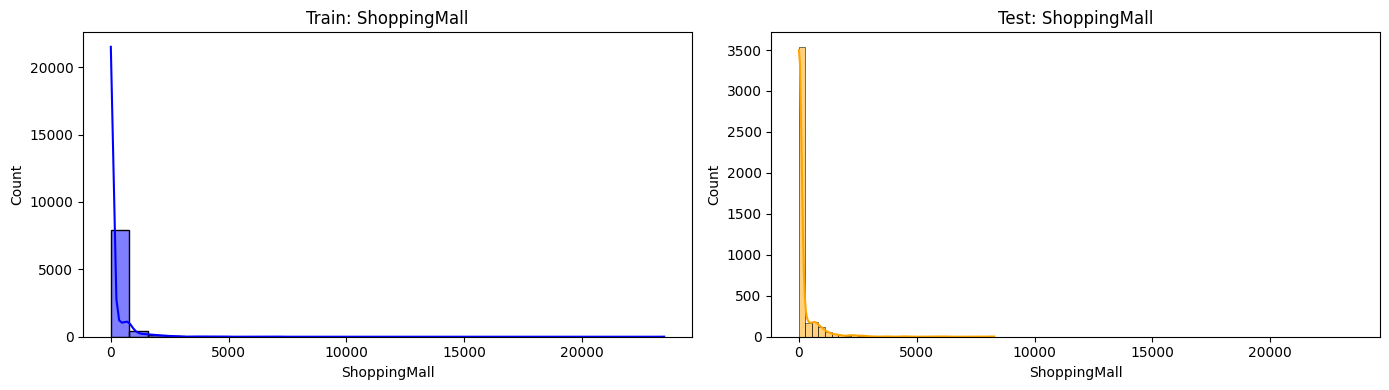

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_vars = ['Age', 'RoomService', 'Spa', 'VRDeck', "FoodCourt", "ShoppingMall"]

# Plot histograms + KDE for train and test side by side
for col in continuous_vars:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
    
    # Train
    sns.histplot(df_train[col], kde=True, ax=axes[0], color='blue', bins=30, alpha=0.5)
    axes[0].set_title(f'Train: {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    
    # Test
    sns.histplot(df_test[col], kde=True, ax=axes[1], color='orange', bins=30, alpha=0.5)
    axes[1].set_title(f'Test: {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()


Most numerical features are positively skewed, so we’ll either apply a transformation or use models robust to skewed data like tree based models (XGB Boost, Catboost...).

## Identifying outliers

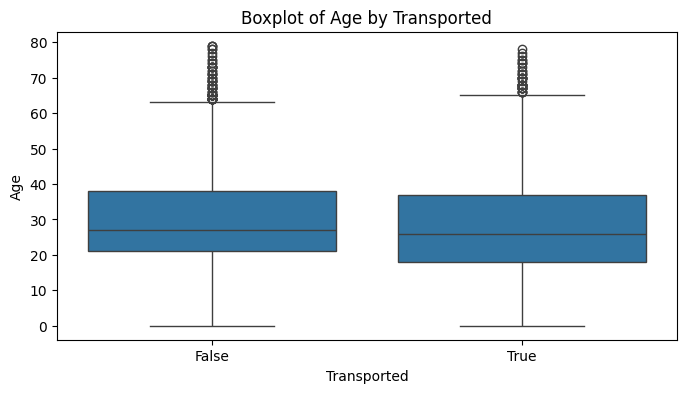

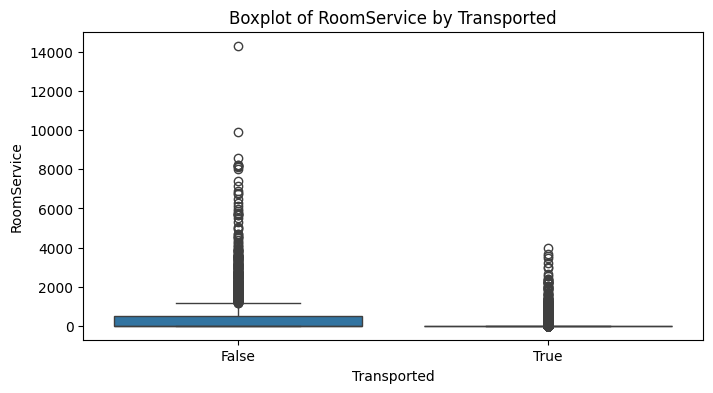

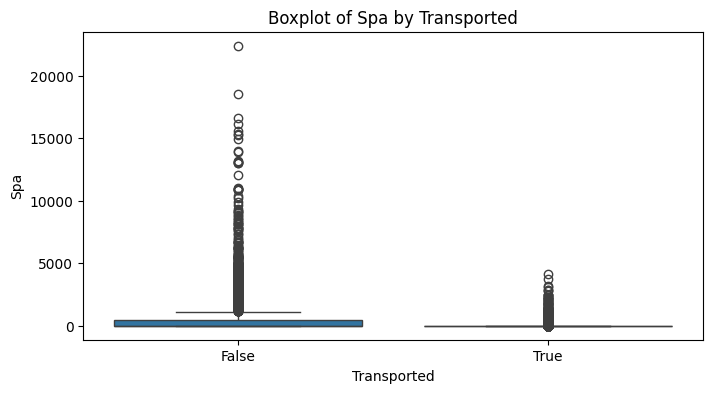

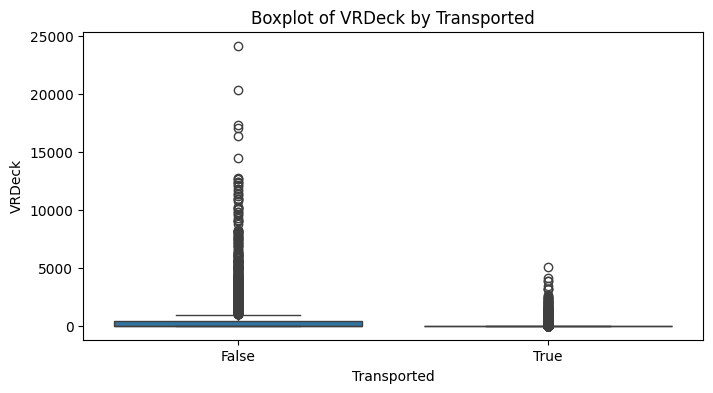

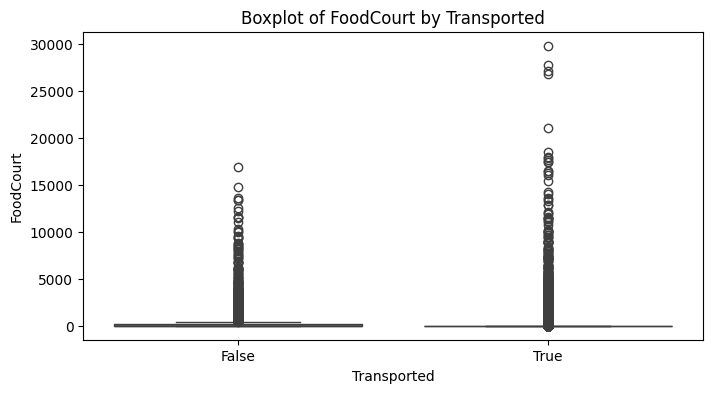

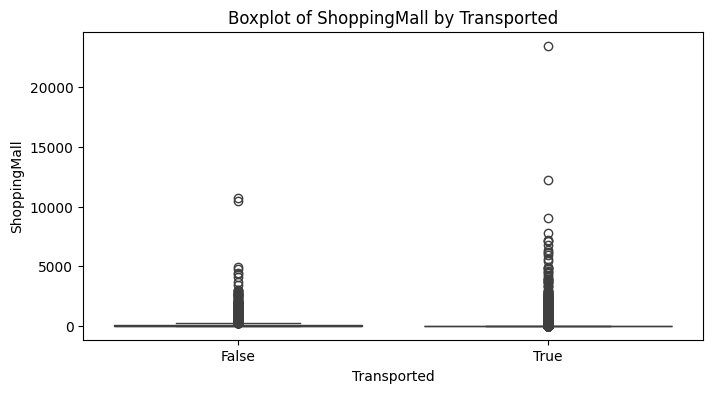

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

# Box plots for continuous variables grouped by Transported
for col in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_train, x='Transported', y=col)
    plt.title(f'Boxplot of {col} by Transported')
    plt.show()

There are many outliers in the data, so we’ll use models that are robust to outliers, such as tree-based algorithms

#### Bivariate analysis

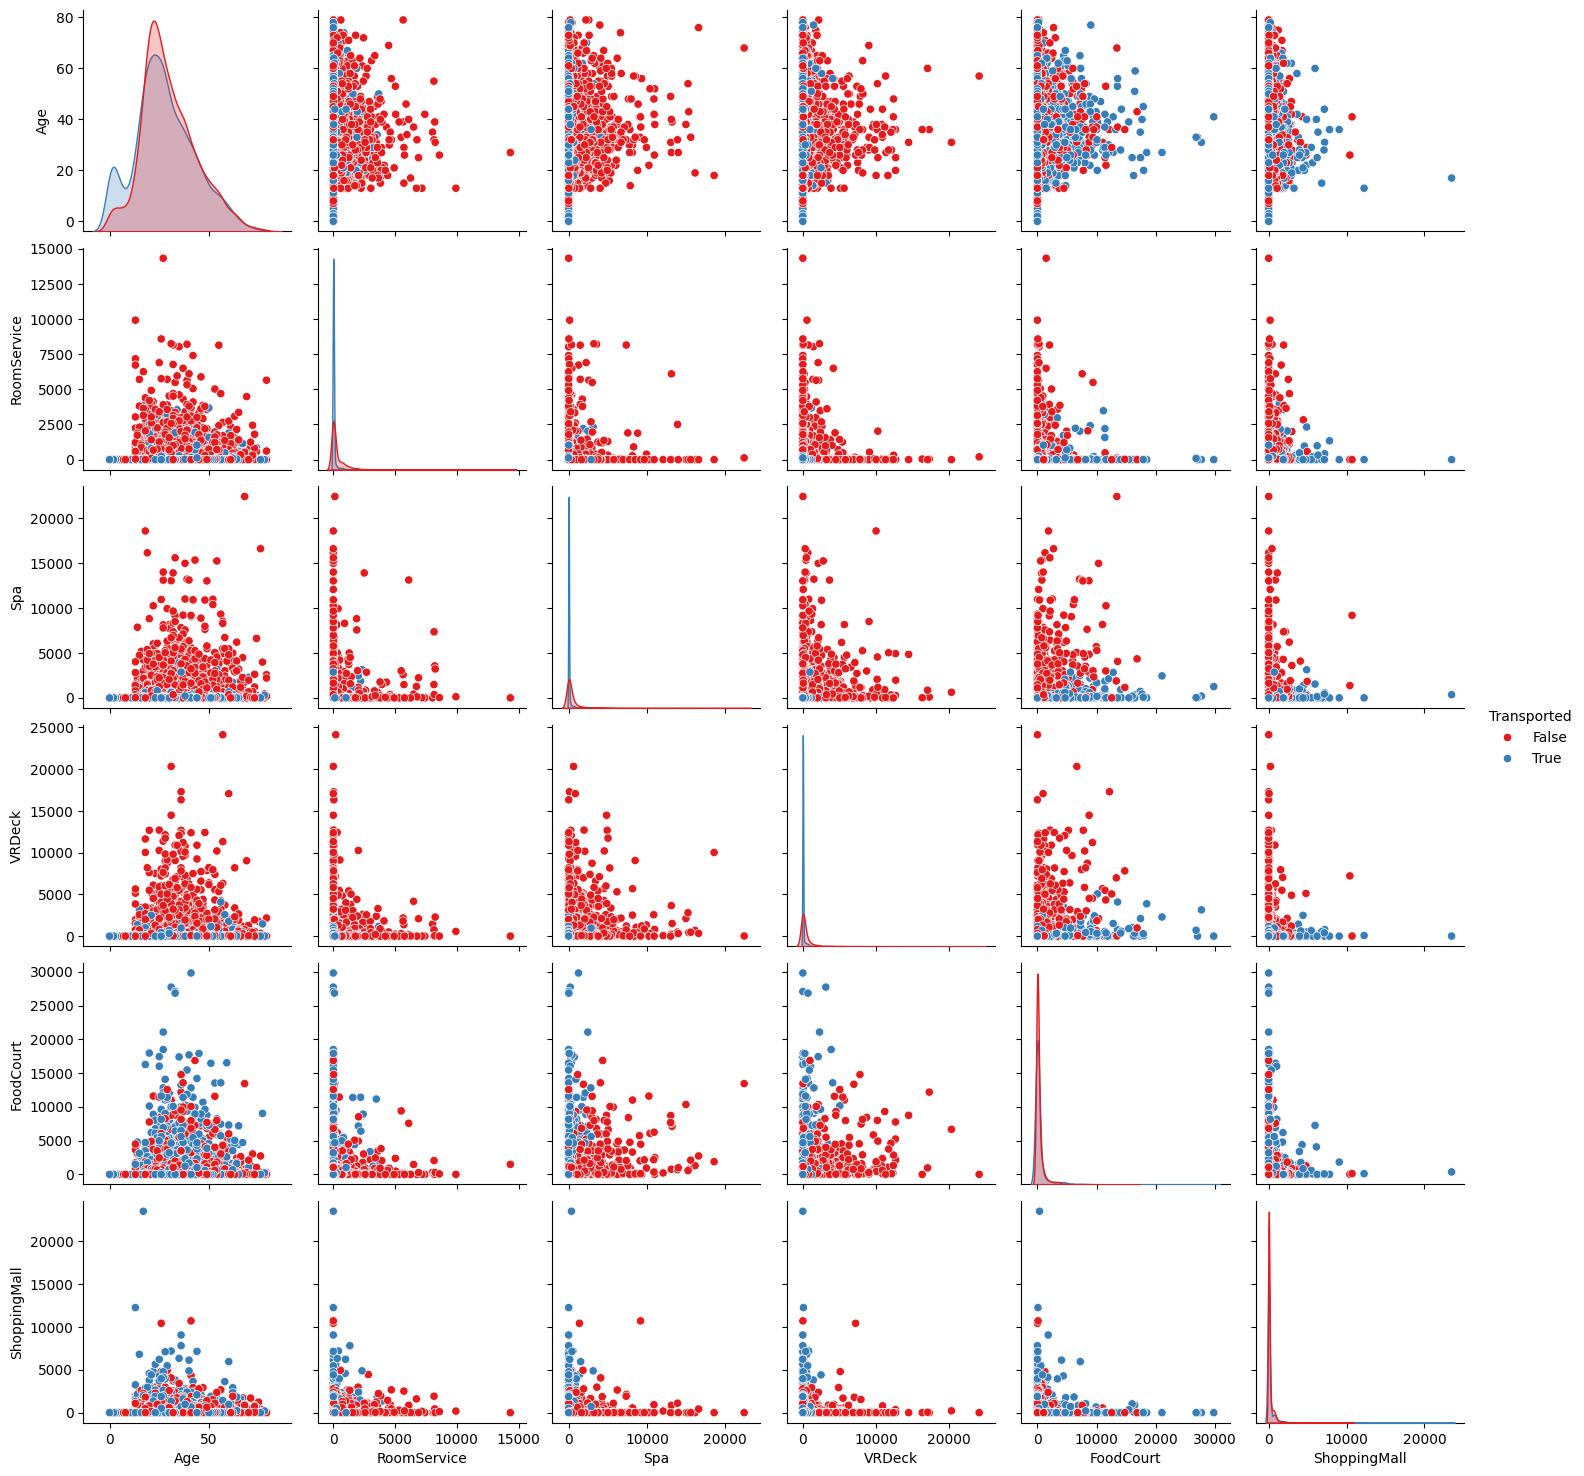

In [14]:

import seaborn as sns

pairplot_cols = ['Age',  'RoomService', 'Spa', 'VRDeck', "FoodCourt", "ShoppingMall"]


sns.pairplot(
	df_train[pairplot_cols + ['Transported']].assign(Transported=df_train['Transported'].astype(str)),
	vars=pairplot_cols,
	hue='Transported',
	palette='Set1',
	diag_kind='kde'
)
plt.show()

### Observation Summary

- People who spent less were transported more.



- Children under 12 spent nothing on luxury services.

In [15]:
corr = df_train.corr(numeric_only=True)

fig_corr = px.imshow(
    corr.fillna(0),
    text_auto=True,
    color_continuous_scale='RdBu',
    title='Correlation Heatmap',
    width=900,
    height=700
)
fig_corr.update_traces(textfont_size=12)
fig_corr.update_traces(zmin=round(corr.min().min(), 1), zmax=round(corr.max().max(), 1), z=np.round(corr.fillna(0).values, 2))
fig_corr.show()


#### Catgorical analysis

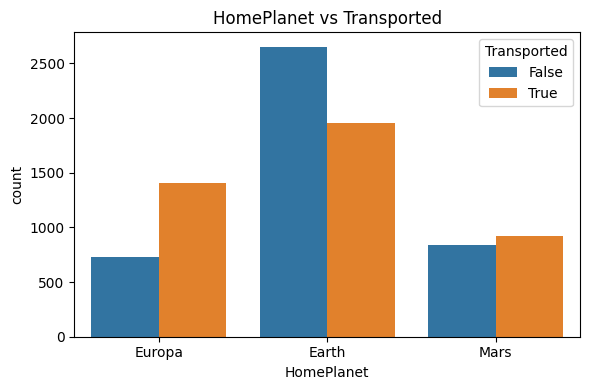

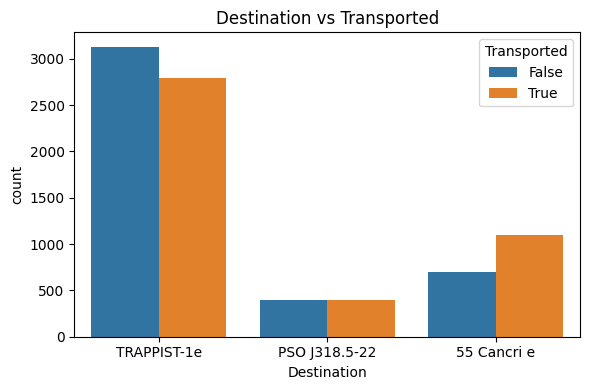

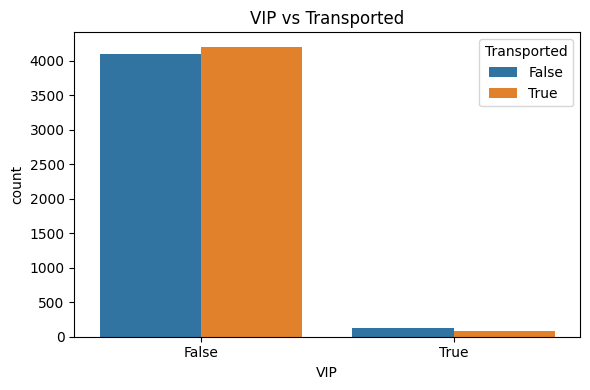

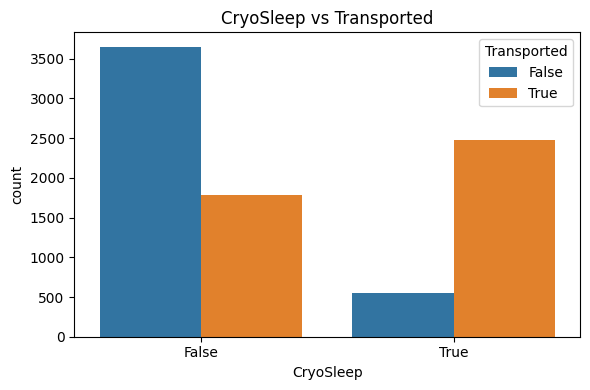

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

categorical_cols = ['HomePlanet', 'Destination', 'VIP', 'CryoSleep']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_train, x=col, hue='Transported')
    plt.title(f'{col} vs Transported')
    plt.legend(title='Transported')
    plt.tight_layout()
    plt.show()


#we notice that the people who opted to cryosleep, were transported more than those who didn't
#people from earth we least transported

#### Data cleaning

In [17]:
for col in df_train.columns:
    if df_train[col].isnull().sum() > 0:
        if df_train[col].dtype == 'object':
            df_train[col].fillna(df_train[col].mode()[0], inplace=True)
        else:
            df_train[col].fillna(df_train[col].median(), inplace=True)



for col in df_test.columns:
    if df_test[col].isnull().sum() > 0:
        if df_test[col].dtype == 'object':
            df_test[col].fillna(df_test[col].mode()[0], inplace=True)
        else:
            df_test[col].fillna(df_test[col].median(), inplace=True)

In [18]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

#### Feature transformation

In [19]:
df_train['Spending'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall']+df_train['Spa'] + df_train['VRDeck']

df_test['Spending'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall']+df_test['Spa'] + df_test['VRDeck']

In [20]:
df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)
df_train['VIP'] = df_train['VIP'].astype(int)

df_test['CryoSleep'] = df_test['CryoSleep'].astype(int)
df_test['VIP'] = df_test['VIP'].astype(int)

In [21]:

df_train[['Deck', 'CabinNum', 'SideLetter']] = df_train['Cabin'].str.split('/', expand=True)
df_test[['Deck', 'CabinNum', 'SideLetter']] = df_test['Cabin'].str.split('/', expand=True)

# Encode 'Deck' as categorical codes
df_train['Deck'] = df_train['Deck'].astype('category').cat.codes
df_test['Deck'] = df_test['Deck'].astype('category').cat.codes

# Convert 'CabinNum' to numeric 
df_train['CabinNum'] = pd.to_numeric(df_train['CabinNum'], errors='coerce').fillna(-1).astype(int)
df_test['CabinNum'] = pd.to_numeric(df_test['CabinNum'], errors='coerce').fillna(-1).astype(int)

# Encode 'SideLetter' as 0 (P) and 1 (S), missing as -1
side_map = {'P': 0, 'S': 1}
df_train['SideLetter'] = df_train['SideLetter'].map(side_map).fillna(-1).astype(int)
df_test['SideLetter'] = df_test['SideLetter'].map(side_map).fillna(-1).astype(int)



In [22]:

df_train['Side'] = df_train['Cabin'].str.split('/').str[-1]


side_map = {'P': 0, 'S': 1}
df_train['Side'] = df_train['Side'].map(side_map).fillna(-1).astype(int)


df_test['Side'] = df_test['Cabin'].str.split('/').str[-1]


side_map = {'P': 0, 'S': 1}
df_test['Side'] = df_test['Side'].map(side_map).fillna(-1).astype(int)


In [23]:

df_train['Group'] = df_train['PassengerId'].str.split('_').str[0]
df_test['Group'] = df_test['PassengerId'].str.split('_').str[0]

df_train['GroupSize'] = df_train.groupby('Group')['Group'].transform('count')
df_test['GroupSize'] = df_test.groupby('Group')['Group'].transform('count')

df_train['Group'] = df_train['Group'].astype('category').cat.codes
df_test['Group'] = df_test['Group'].astype('category').cat.codes





In [24]:
df_train[(df_train['CryoSleep'] == 1) & (df_train['Spending'] > 0)]
df_test[(df_test['CryoSleep'] == 1) & (df_test['Spending'] > 0)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Spending,Deck,CabinNum,SideLetter,Side,Group,GroupSize


In [25]:


le = LabelEncoder()
df_train['HomePlanet'] = le.fit_transform(df_train['HomePlanet'])
df_test['HomePlanet'] = le.fit_transform(df_test['HomePlanet'])


In [26]:
df_train['Destination'] = le.fit_transform(df_train['Destination'])
df_test['Destination'] = le.fit_transform(df_test['Destination'])


In [27]:
df_train['NoSpend'] = (df_train['Spending'] == 0).astype(int)
df_test['NoSpend'] = (df_test['Spending'] == 0).astype(int)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


feature_columns = ['HomePlanet', 'CryoSleep', 'Age', 'VIP', 
                   'RoomService', 'Spa', 'VRDeck', 'Side', 
                   'Spending', 'NoSpend', 'CabinNum', 'Deck',"GroupSize", "Group"]
X = df_train[feature_columns]
y = df_train['Transported'].astype(int)
X_test = df_test[feature_columns]

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


adv_X = pd.concat([X_train, X_test], axis=0)
adv_y = np.concatenate([np.zeros(len(X_train)), np.ones(len(X_test))])

# Split for adversarial validation
adv_X_train, adv_X_val, adv_y_train, adv_y_val = train_test_split(
    adv_X, adv_y, test_size=0.2, random_state=42, stratify=adv_y
)

# Train adversarial classifier
adv_model = RandomForestClassifier(n_estimators=100, random_state=42)
adv_model.fit(adv_X_train, adv_y_train)
adv_pred = adv_model.predict(adv_X_val)
adv_acc = accuracy_score(adv_y_val, adv_pred)
print(f"Adversarial Validation Accuracy: {adv_acc:.4f}")

# Feature importances
importances = pd.Series(adv_model.feature_importances_, index=adv_X.columns)
top_features = importances.sort_values(ascending=False).head(10)

# PrettyTable for feature importances
table = PrettyTable()
table.field_names = ["Feature", "Importance"]
for feat, imp in top_features.items():
    table.add_row([feat, f"{imp:.4f}"])
print(table)

Adversarial Validation Accuracy: 0.9559
+-------------+------------+
|   Feature   | Importance |
+-------------+------------+
|    Group    |   0.4587   |
|   CabinNum  |   0.2701   |
|     Age     |   0.0532   |
|     Deck    |   0.0480   |
|   Spending  |   0.0387   |
|     Spa     |   0.0260   |
|    VRDeck   |   0.0257   |
| RoomService |   0.0256   |
|  GroupSize  |   0.0221   |
|  HomePlanet |   0.0139   |
+-------------+------------+


the accuracy of the adversial model is very high, so I decided to drop the Group feature

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from catboost import CatBoostClassifier




feature_columns = ['HomePlanet', 'CryoSleep', 'Age', 'VIP', 
                   'RoomService', 'Spa', 'VRDeck', 'Side', 
                   'Spending', 'NoSpend', 'CabinNum', 'Deck',"GroupSize"]
X = df_train[feature_columns]
y = df_train['Transported'].astype(int)
X_test = df_test[feature_columns]

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_val_scaled = scaler.transform(X_val.select_dtypes(include=np.number))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=np.number))

# Reinsert scaled values into full DataFrame
X_train_scaled_df = X_train.copy()
X_train_scaled_df[X_train.select_dtypes(include=np.number).columns] = X_train_scaled

X_val_scaled_df = X_val.copy()
X_val_scaled_df[X_val.select_dtypes(include=np.number).columns] = X_val_scaled

X_test_scaled_df = X_test.copy()
X_test_scaled_df[X_test.select_dtypes(include=np.number).columns] = X_test_scaled

# Base models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    if name == 'Logistic Regression':
        model.fit(X_train_scaled_df, y_train)
        pred = model.predict(X_val_scaled_df)
    else:
        model.fit(X_train, y_train)
        pred = model.predict(X_val)
    acc = accuracy_score(y_val, pred)
    results[name] = acc
    print(f"{name} Validation Accuracy: {acc:.4f}")

# Select best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Retrain on full training set
if best_model_name == 'Logistic Regression':
    best_model.fit(X_train_scaled_df, y_train)
    val_pred = best_model.predict(X_val_scaled_df)
    test_pred = best_model.predict(X_test_scaled_df)
else:
    best_model.fit(X_train, y_train)
    val_pred = best_model.predict(X_val)
    test_pred = best_model.predict(X_test)

# Evaluation
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Classification Report:\n", classification_report(y_val, val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_pred))

# Feature importance
if hasattr(best_model, 'feature_importances_'):
    importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    print("\nFeature Importances:\n", importance)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': test_pred.astype(bool)
})
submission.to_csv('submission.csv', index=False)



Random Forest Validation Accuracy: 0.7993
XGBoost Validation Accuracy: 0.8125
Gradient Boosting Validation Accuracy: 0.7959
Logistic Regression Validation Accuracy: 0.7838
CatBoost Validation Accuracy: 0.8091
Validation Accuracy: 0.8125359401955147
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       863
           1       0.81      0.82      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739

Confusion Matrix:
 [[699 164]
 [162 714]]

Feature Importances:
         Feature  Importance
9       NoSpend    0.905969
0    HomePlanet    0.021953
1     CryoSleep    0.013350
11         Deck    0.010117
6        VRDeck    0.008077
5           Spa    0.007415
7          Side    0.006145
8      Spending    0.006035
4   RoomService    0.005955
10     CabinNum    0.004573
2           Age    0.004185

In [30]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize CatBoostClassifier with basic parameters
catboost_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

# Fit on training data (CatBoost handles categorical features natively, but here all features are numeric)
catboost_model.fit(X_train, y_train)

# Predict on validation and test sets
cat_val_pred = catboost_model.predict(X_val)
cat_test_pred = catboost_model.predict(X_test)



cat_val_accuracy = accuracy_score(y_val, cat_val_pred)
print(f"CatBoost Validation Accuracy: {cat_val_accuracy:.4f}")

print("\nCatBoost Classification Report:")
print(classification_report(y_val, cat_val_pred))

print("\nCatBoost Confusion Matrix:")
print(confusion_matrix(y_val, cat_val_pred))

CatBoost Validation Accuracy: 0.8120

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       863
           1       0.81      0.82      0.82       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739


CatBoost Confusion Matrix:
[[691 172]
 [155 721]]
